Загружаем данные

In [ ]:
import networkx as nx
import pickle
from collections import Counter
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
from scipy.sparse import csr_matrix
from scipy.stats import poisson

In [ ]:
with open('/content/drive/MyDrive/6/СС/1/another_users1.pickle', 'rb') as handle:
    users1 = pickle.load(handle)

In [ ]:
with open('/content/drive/MyDrive/6/СС/1/another_users2.pickle', 'rb') as handle:
    users2 = pickle.load(handle)

In [ ]:
with open('/content/drive/MyDrive/6/СС/1/another_friends1.pickle', 'rb') as handle:
    friends1 = pickle.load(handle)

In [ ]:
with open('/content/drive/MyDrive/6/СС/1/another_friends2.pickle', 'rb') as handle:
    friends2 = pickle.load(handle)

In [ ]:
edges1 = []
for member in users1:
  if member in friends1.keys():
    member_friends_list = friends1[member]
    if len(member_friends_list) > 0:
        for friend in member_friends_list:
            if ((friend, member) not in edges1) and (friend in users1):
                edges1.append((member, friend))

In [ ]:
graph1 = nx.Graph()
graph1.add_edges_from(edges1)

In [ ]:
edges2 = []
for member in users2:
  if member in friends2.keys():
    member_friends_list = friends2[member]
    if len(member_friends_list) > 0:
        for friend in member_friends_list:
            if ((friend, member) not in edges2) and (friend in users2):
                edges2.append((member, friend))

In [ ]:
graph2 = nx.Graph()
graph2.add_edges_from(edges2)

Распределение степенй вершин

In [ ]:
def distribution(graph):
  matr = nx.to_scipy_sparse_matrix(graph)
  matrix = matr.toarray()
  n = matrix.shape[0]
  k = [sum(matrix[i]) for i in range(n)]
  k_count = dict(Counter(k))
  k_count = dict(map(lambda x: (x[0], x[1]/n), k_count.items()))
  fig, ax = plt.subplots(figsize=(10, 5))
  plt.bar(k_count.keys(), k_count.values())
  plt.show()
  return n, k

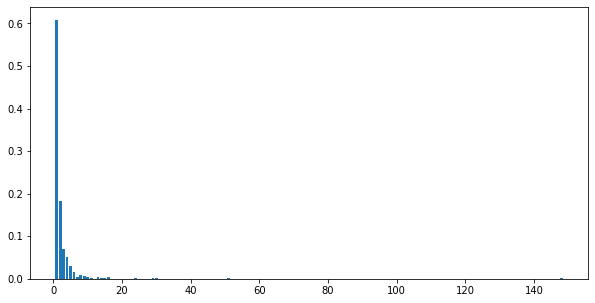

In [ ]:
n1, k1 = distribution(graph1)

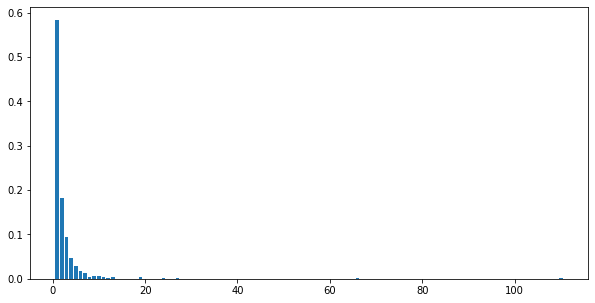

In [ ]:
n2, k2 = distribution(graph2)

Кластерный коэффициент

In [ ]:
c1 = nx.transitivity(graph1)
c1

0.03121272365805169

In [ ]:
c2 = nx.transitivity(graph2)
c2

0.03947729141917208

Средняя длина пути

Так как подсчёт средней длины пути в несвязном графе невозможен, нужно считать среднюю длину пути у каждой компоненты связности графа отдельно 

In [ ]:
nx.number_connected_components(graph1)

68

In [ ]:
nx.number_connected_components(graph2)

70

Функция для посчета средней длины пути и отрисовки самой большой компоненты связности:

In [ ]:
def path_length(graph):
  components = nx.connected_components(graph)
  s = [graph.subgraph(c).copy() for c in components]
  paths = [nx.average_shortest_path_length(i) for i in s]
  n = paths.index(max(paths))
  print('Средняя длина пути у самой крупной компоненты связности: ', max(paths))
  print('Усреднение средних длин путей всех компонент связности графа: ', np.average(paths))
  fig, ax = plt.subplots(figsize=(6,6))
  nx.draw(s[n], with_labels=False,
        node_size=[9 for _ in range(len(s[n].nodes))])
  return np.average(paths)

Средняя длина пути у самой крупной компоненты связности:  3.9959831371301306
Усреднение средних длин путей всех компонент связности графа:  1.1077840657421099


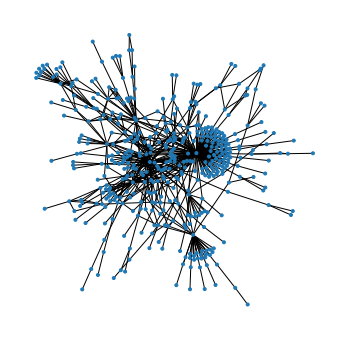

In [ ]:
avg_l1 = path_length(graph1)

Средняя длина пути у самой крупной компоненты связности:  4.326394772931753
Усреднение средних длин путей всех компонент связности графа:  1.137043734851406


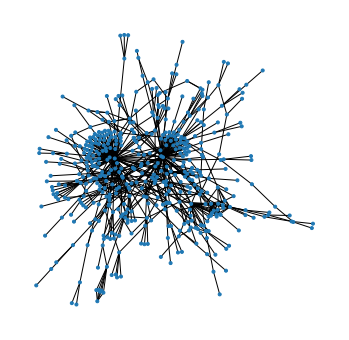

In [ ]:
avg_l2 = path_length(graph2)

Диапазоны оценок существующих моделей

In [ ]:
print('First group:')
print('Degree distribution: power law')
print('Clustering coefficient: ', c1)
print('Average path length: ', avg_l1)
print(' ')
print('Second group:')
print('Degree distribution: power law')
print('Clustering coefficient: ', c2)
print('Average path length: ', avg_l2)

First group:
Degree distribution: power law
Clustering coefficient:  0.03121272365805169
Average path length:  1.1077840657421099
 
Second group:
Degree distribution: power law
Clustering coefficient:  0.03947729141917208
Average path length:  1.137043734851406


Random
Degree distribution: poisson
 
First group:
Clustering coefficient:  0.004094444444444444
Average path length:  7.117146303783062
 
Second group:
Clustering coefficient:  0.0038156254515442508
Average path length:  7.248108963955368


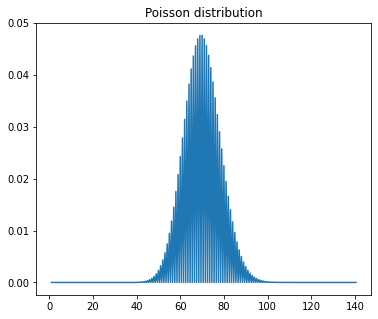

In [ ]:
print('Random')
print('Degree distribution: poisson')
print(' ')
print('First group:')
print('Clustering coefficient: ', np.average(k1)/n1)
print('Average path length: ', np.log(n1)/np.log(np.average(k1)))
print(' ')
print('Second group:')
print('Clustering coefficient: ', np.average(k2)/n2)
print('Average path length: ', np.log(n2)/np.log(np.average(k2)))

x = np.arange(1, 141, 0.5)
y = poisson.pmf(x, mu=70)
fig, ax = plt.subplots(figsize=(6,5))
plt.plot(x, y)
plt.title('Poisson distribution')
plt.show()


BA model
Degree distribution: power law
 
First group:
Clustering coefficient:  0.00824872000639961
Average path length:  3.44695934285351
 
Second group:
Clustering coefficient:  0.007868181262492585
Average path length:  3.4626147897681148


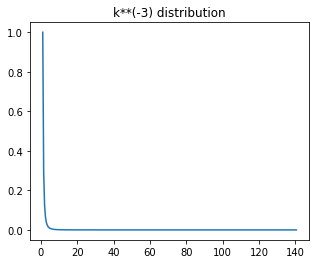

In [ ]:
print('BA model')
print('Degree distribution: power law')
print(' ')
print('First group:')
print('Clustering coefficient: ', n1**(-0.75))
print('Average path length: ', np.log(n1)/np.log(np.log(n1)))
print(' ')
print('Second group:')
print('Clustering coefficient: ', n2**(-0.75))
print('Average path length: ', np.log(n2)/np.log(np.log(n2)))

x = np.arange(1, 141, 0.5)
y = np.array(list(map(lambda x1: x1**(-3), x)))
fig, ax = plt.subplots(figsize=(5,4))
plt.plot(x, y)
plt.title('k**(-3) distribution')
plt.show()

WS model
Degree distribution: poisson
 
First group:
Clustering coefficient:  const
Average path length:  6.396929655216146
 
Second group:
Clustering coefficient:  const
Average path length:  6.459904454377535


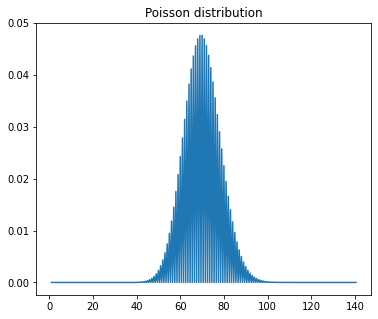

In [ ]:
print('WS model')
print('Degree distribution: poisson')
print(' ')
print('First group:')
print('Clustering coefficient: ', 'const')
print('Average path length: ', np.log(n1))
print(' ')
print('Second group:')
print('Clustering coefficient: ', 'const')
print('Average path length: ', np.log(n2))

x = np.arange(1, 141, 0.5)
y = poisson.pmf(x, mu=70)
fig, ax = plt.subplots(figsize=(6,5))
plt.plot(x, y)
plt.title('Poisson distribution')
plt.show()

In [48]:
print('Empirical networks')
print('Degree distribution: power law')
print('Clustering coefficient: ', 'large')
print('Average path length: ', 'small')

Empirical networks
Degree distribution: power law
Clustering coefficient:  large
Average path length:  small


Дополнение

Использованные статьи:

https://www.pnas.org/doi/epdf/10.1073/pnas.012582999

https://en.wikipedia.org/wiki/Watts%E2%80%93Strogatz_model#Average_path_length

https://en.wikipedia.org/wiki/Barab%C3%A1si%E2%80%93Albert_model

https://chih-ling-hsu.github.io/2020/05/15/watts-strogatz

https://arxiv.org/ftp/arxiv/papers/1809/1809.07686.pdf

https://pdodds.w3.uvm.edu/research/papers/others/2006/kossinets2006a.pdf

https://en.wikipedia.org/wiki/Erd%C5%91s%E2%80%93R%C3%A9nyi_model

